In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

## 整理資料格式
CNN讀的是照片，所以不用把28*28的圖改成728

但是它需要rgb三層維度，或是使用灰階，使用灰階也要多宣告一個維度

In [5]:
x = x_train
x_train = x_train.reshape(60000,28,28,1)

In [6]:
x[1].shape

(28, 28)

In [7]:
x_train[0].shape

(28, 28, 1)

### one hot encoding

In [8]:
from keras.utils import np_utils

In [9]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [10]:
from keras.models import Sequential
from keras.layers import (Dense,
                          Activation,
                          Flatten,
                          Conv2D,
                          MaxPooling2D)
from keras.optimizers import Adam
#from keras.optimizers import SGD

## 建構神經網路

In [11]:
model = Sequential()

## 卷積、池化識別圖案特色
#### Conv2D -> relu -> MaxPooling2D
卷積 -> 激活 -> 池化

In [12]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))

In [13]:
model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Activation('sigmoid'))

In [14]:
model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(Activation('relu'))

In [15]:
model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Activation('sigmoid'))

In [16]:
model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(Activation('relu'))

In [17]:
model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Activation('sigmoid'))

## 轉到全連接層學習

In [18]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [19]:
model.add(Dense(10))
model.add(Activation('softmax'))

## 組裝

In [20]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

Param = （輸入數據維度+1）* 神經元個數

32個3*3的 filter，會有9個維度、32個神經元

In [22]:
((3*3)+1)*32

320

In [23]:
model.fit(x_train,y_train,batch_size=100,epochs=12)

Epoch 1/12
60000/60000 [==============================] - 10s 173us/step - loss: 0.6919 - accuracy: 0.8750
Epoch 2/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.1278 - accuracy: 0.9641
Epoch 3/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0740 - accuracy: 0.9778
Epoch 4/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.0536 - accuracy: 0.9834
Epoch 5/12
60000/60000 [==============================] - 10s 161us/step - loss: 0.0375 - accuracy: 0.9884
Epoch 6/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0276 - accuracy: 0.9911
Epoch 7/12
60000/60000 [==============================] - 8s 137us/step - loss: 0.0209 - accuracy: 0.9930
Epoch 8/12
60000/60000 [==============================] - 8s 137us/step - loss: 0.0176 - accuracy: 0.9941
Epoch 9/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.0164 - accuracy: 0.9942
Epoch 10/12
60000/60000 [================

In [24]:
score = model.evaluate(x_test.reshape(10000,28,28,1),y_test)

10000/10000 [==============================] - 2s 168us/step


In [25]:
print('loss:',score[0])
print('acc:',score[1])

loss: 0.0535312227297436
acc: 0.98580002784729


In [26]:
model_json = model.to_json()
open('cnn_write_architecture_test.json','w').write(model_json)
model.save_weights('cnn_write_weight_test.h5')

In [27]:
predict = model.predict_classes(x_test.reshape(10000,28,28,1))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


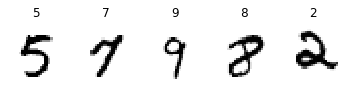

In [28]:
pick = np.random.randint(0,10000,5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28),cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")
    print(y_test[pick[i]])